# Lesson 01 - From Machine Learning to Deep Learning

## Training Logistic classifier
- Is a Linear Classifier

```
W X + b = Y
```
- W, X are matrices
- X is input
- W (Weights) and b (bias) are found by training the model
- Y vector 
    - contains output prediction score for each possible output
    - also known as Logits for Logistic Regression
    - turned into probabilities (by using SoftMax function)

In [1]:
scores = [3.0, 1.0, 0.2]

In [22]:
import numpy as np

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

In [24]:
import matplotlib.pyplot as plt

x = np.arange(-2.0, 6.0, 0.1)
scores = np.vstack([x, np.ones_like(x), 0.2 * np.ones_like(x)])
scores.shape

(3, 80)

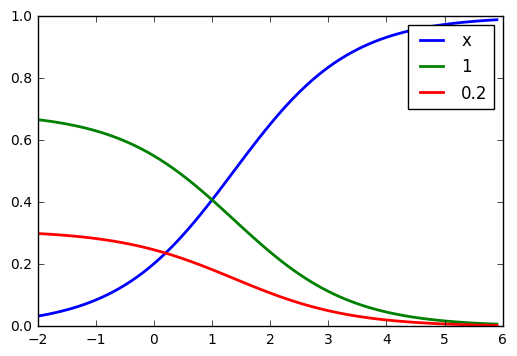

In [26]:
plt.plot(x, softmax(scores).T, linewidth = 2)
plt.legend(['x', '1', '0.2'])
plt.show()

If we increase the magnitude of scores then classifier becomes more confident but if we decrease the size of the outputs then the classifier becomes less confident

![](effect_of_magnitude_on_classifier.png)

## One Hot encoding
- Each label would be represented by a vector which is as long as the number of labels and has value 1.0 for the label and 0 for other labels
- Works not well when we have tens of thousands of labels or more. We have lots of zeros at that time
- We can find how well we are doing by simply comparing 2 vectors
![](cross_entropy.png)

Putting all pieces together we have the following Multinomial Logistic Classification
![](multinomial_logistic_classification.png)

```
D(S(W * X + b), L)
```

## Minimizing Cross Entropy
- Now how do we find the W and b so that our classifier works i.e. D(A, a) is less but D(A, b) is high
- We can try and minimize the loss when summed over all training data
\begin{align}
L = (1/ N) *  \sum_{i} D(S(WX_{i} + b), L_{i})
\end{align}

- We need to calculate the derivative w.r.t to parameters and follow derivative to solution. This is called gradient descent

## Numerical stability
- You have to worry abut calculating values that are too big or too small whenever doing numerical computation


In [9]:
a = 10 ** 9
for i in range(10 ** 6):
    a += 10 ** (-6)
    
a - 10 ** 9

0.95367431640625

- For numerical stability the values involved in our Loss function L should not get too big or too small.
- A good principle is
    - 0 mean
    - equal variance
![](mean_variance.png)

- For images it is simple to normalize it by 
\begin{align}
(R/G/B - 128) / 128
\end{align}

- The weights and bias should also be good enough for gradient descent to proceed
- Many many but a simple way is to take from gaussian distribution with mean 0 and small variance. Higher variance would mean that the our model is opinioninated in the beginning which we don't want. Our model should be uncertain in the beginning and learn from data

- Validation sets are needed because as we iterate we are exposing the test set to classifier through our decisions
- Using 30000 examples as validation set is good. But if that is a lot of data then we could possibly use cross validation

- Logistic Regression's biggest problem is that it is very difficult to scale
    - Depends on all of data
    - Usually computing the gradient uses 3 times the compute of Loss function
    - In gradient descent we iterate
    - So instead of using all of data we use a small random sample and iterate more. This is called Stochastic Gradient Descent (SGD)
    - SGD is important because it scales well with big data and big models
    ![](sgd.png)

## Helping SGD
- Momentum
    - Instead of using the current direction we use the knowledge of the general direction in which we are going to decide the current direction in which we want to go
    - ![](momentum.png)
- Learning Rate average
    - Learing rate should be decreased over time